# Experimentando classificação com diferentes tipos de preprocessamento no calculo do LBP

## Importando bibliotecas

In [1]:
# import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

TARGET_NAMES = {'normal': 0,
                'broca':1,
                'fissura': 2,
                'musgo': 3}

Rodada 0	-	Seed 3715


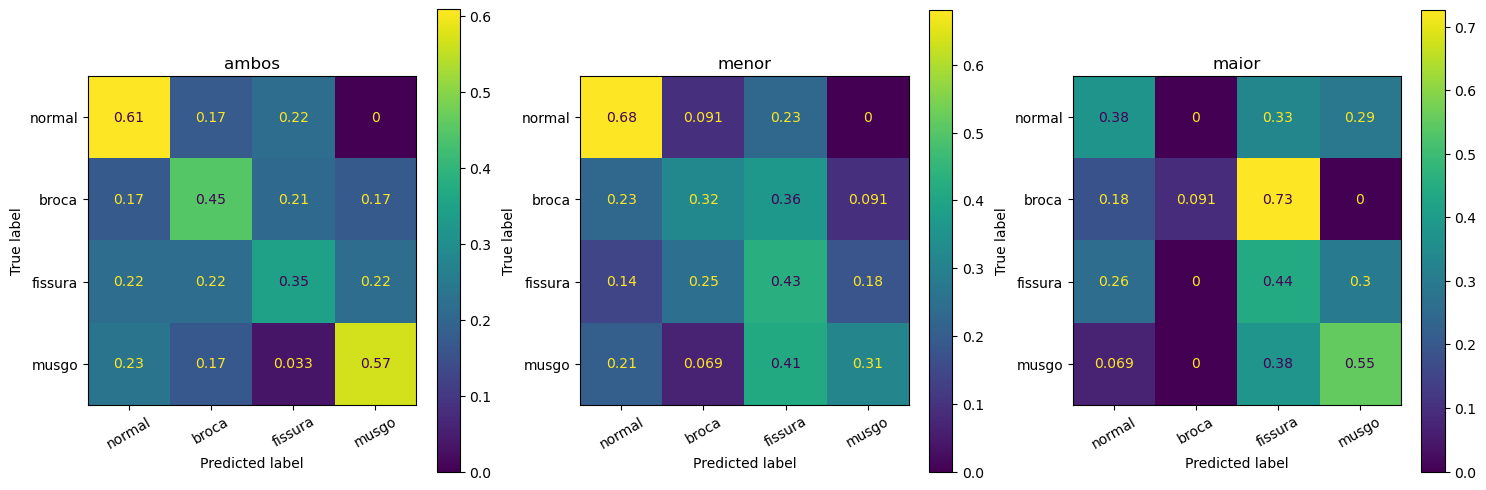

Rodada 1	-	Seed 4174


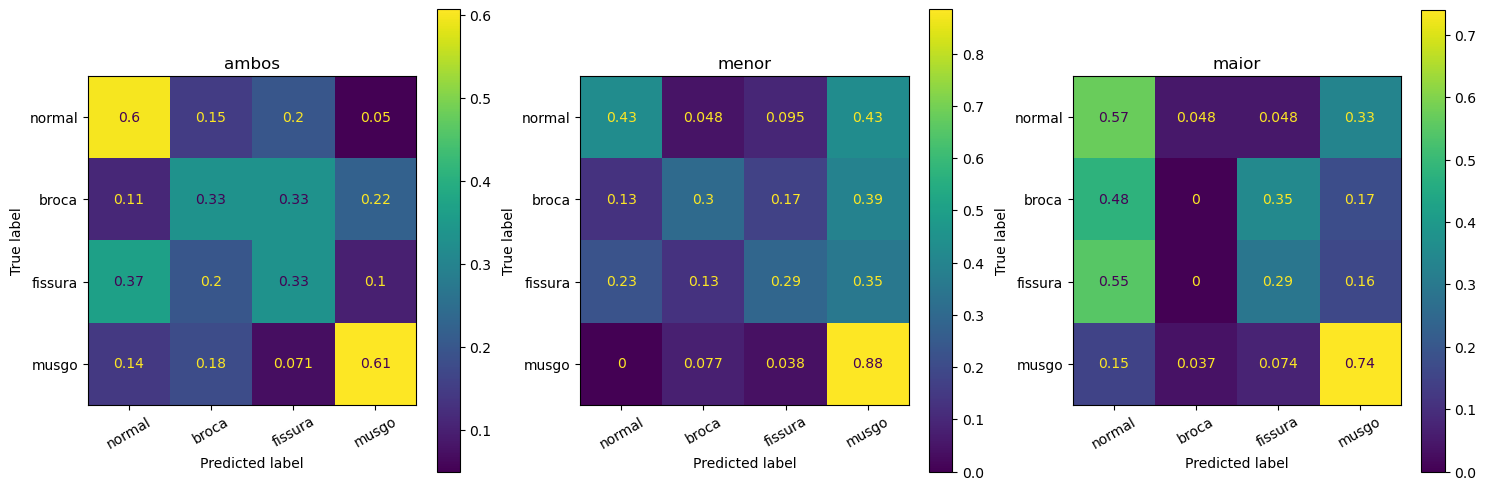

Rodada 2	-	Seed 134


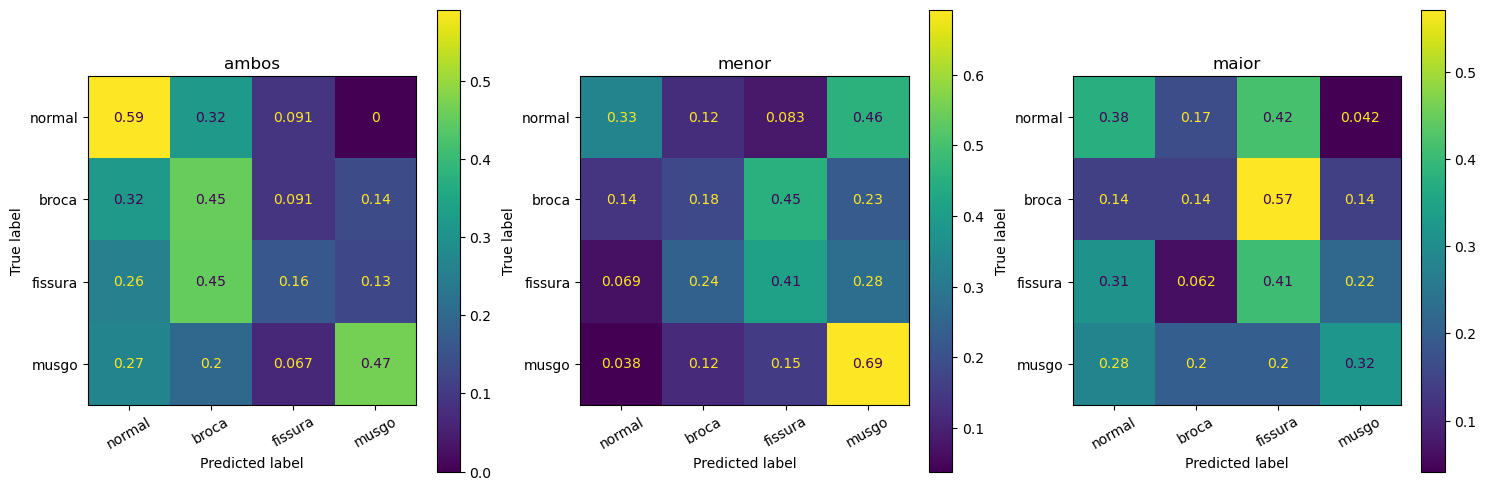

Rodada 3	-	Seed 4926


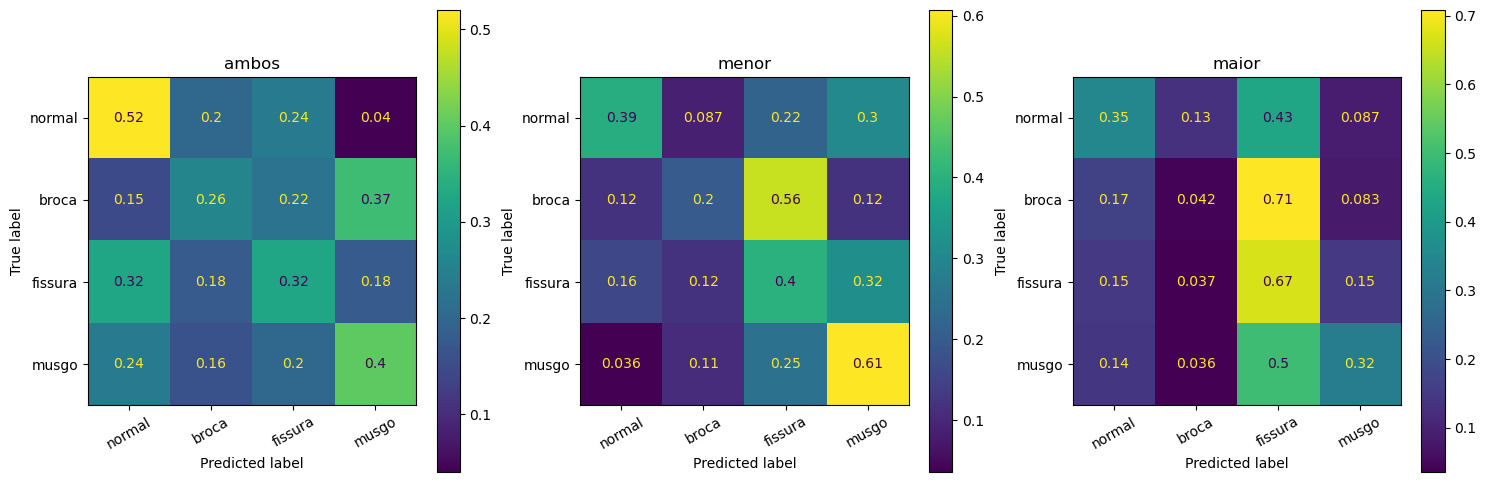

Rodada 4	-	Seed 5180


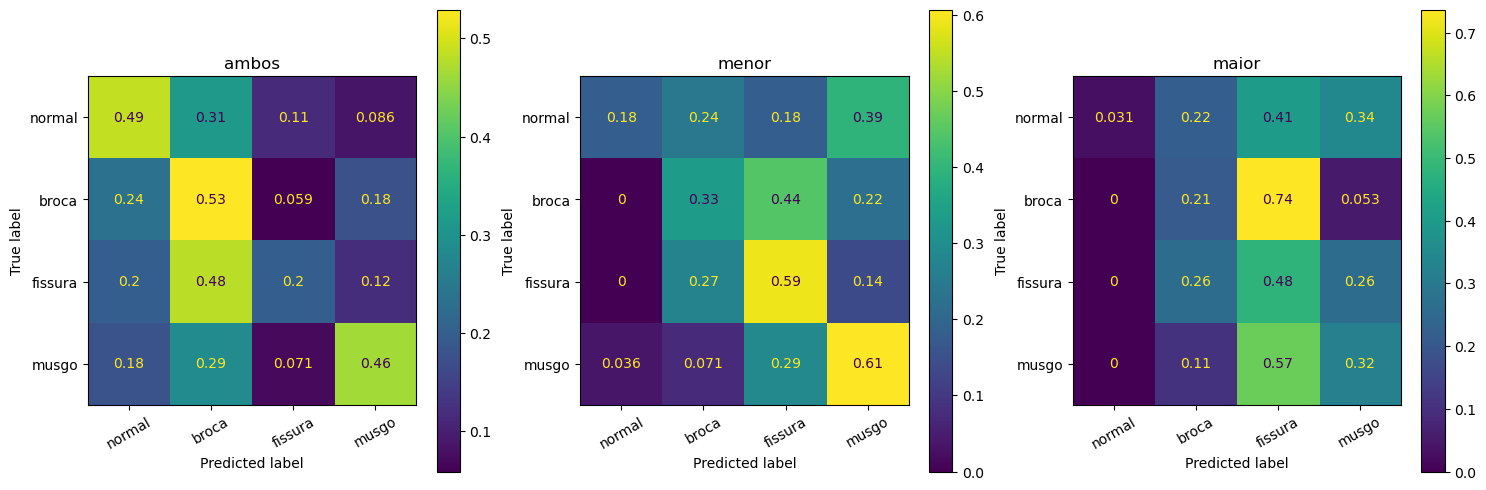

Rodada 5	-	Seed 6124


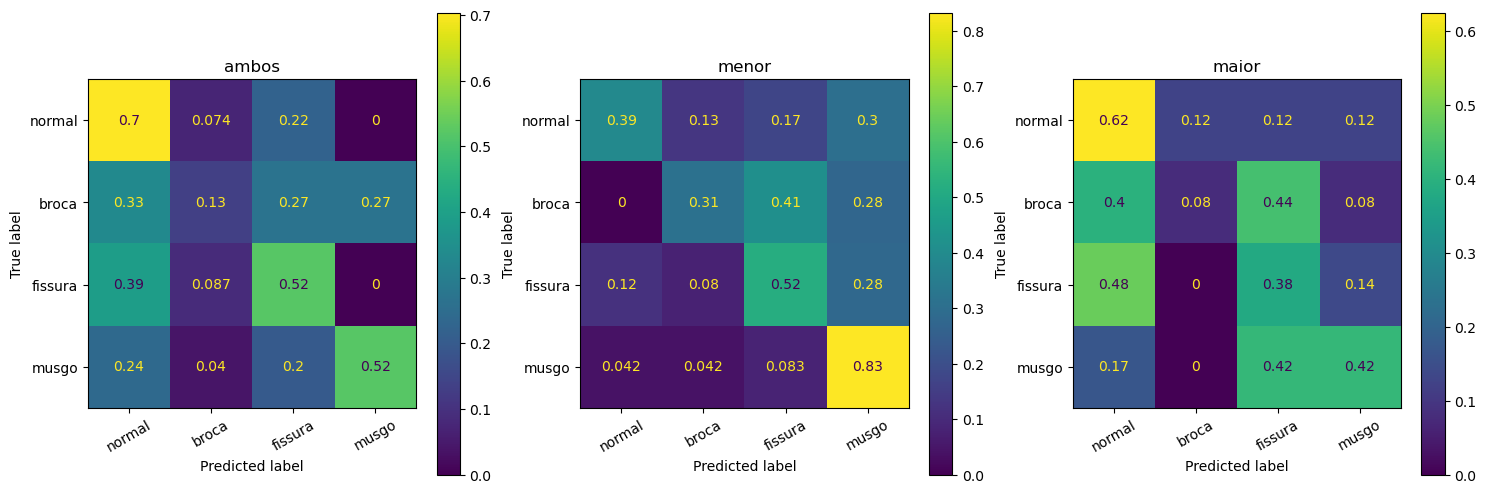

Rodada 6	-	Seed 1027


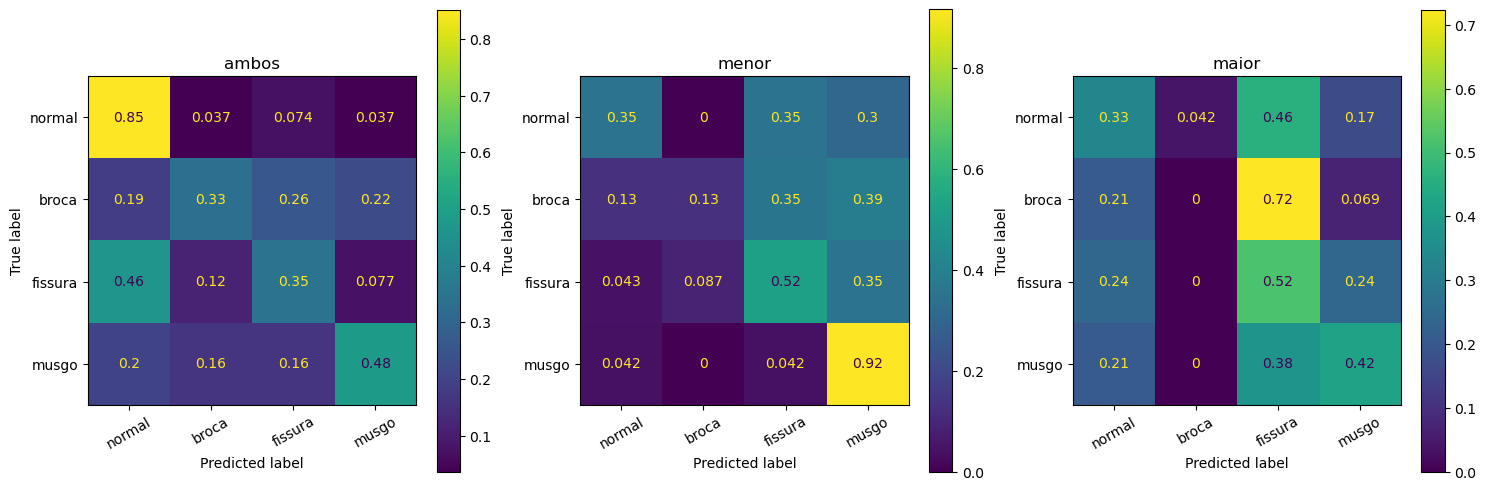

Rodada 7	-	Seed 6899


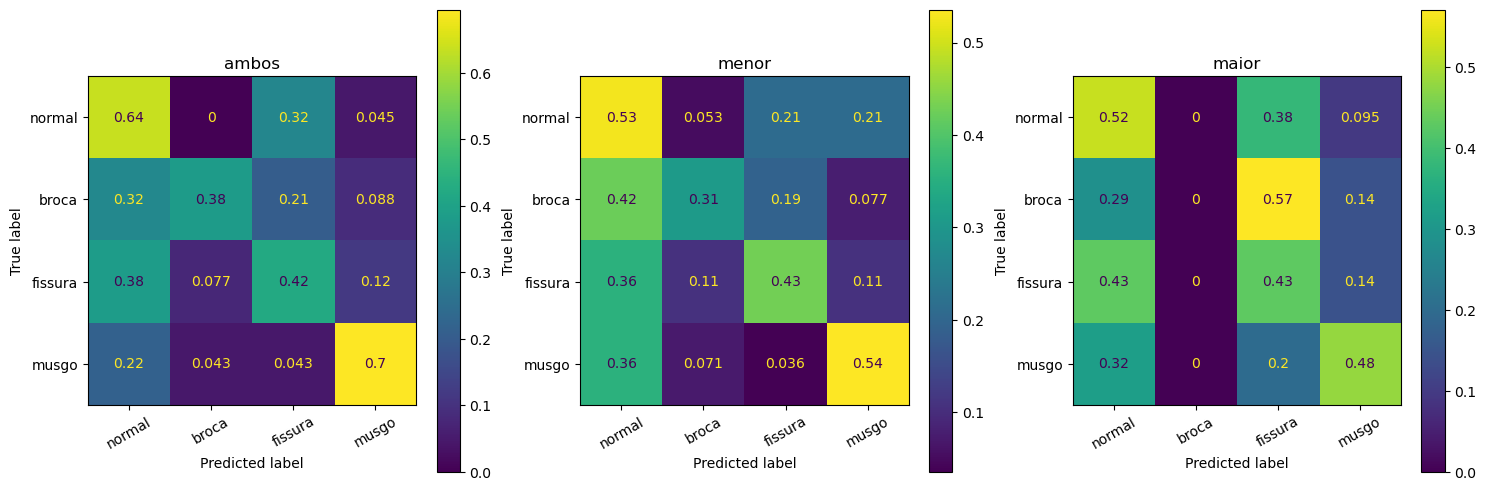

Rodada 8	-	Seed 4164


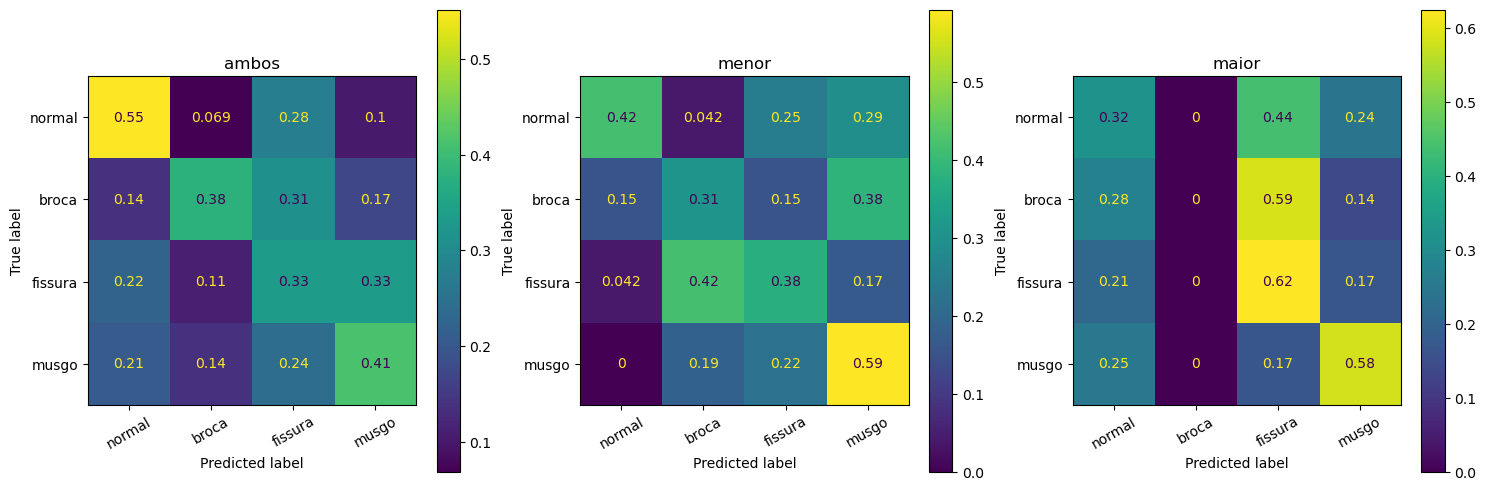

Rodada 9	-	Seed 7481


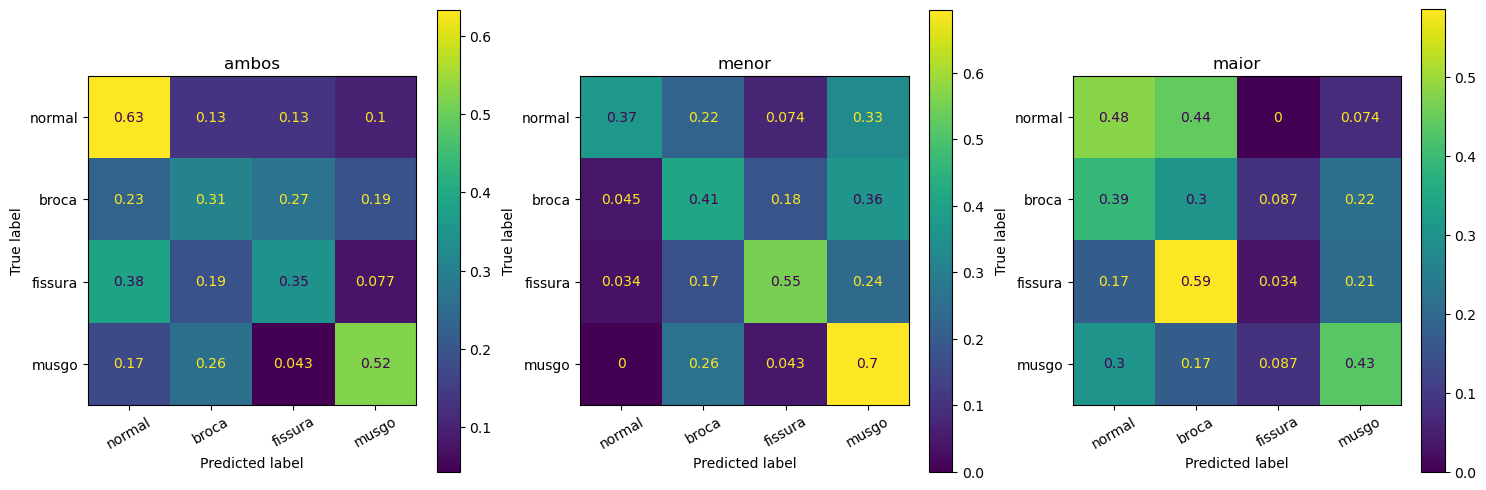

Rodada 10	-	Seed 4298


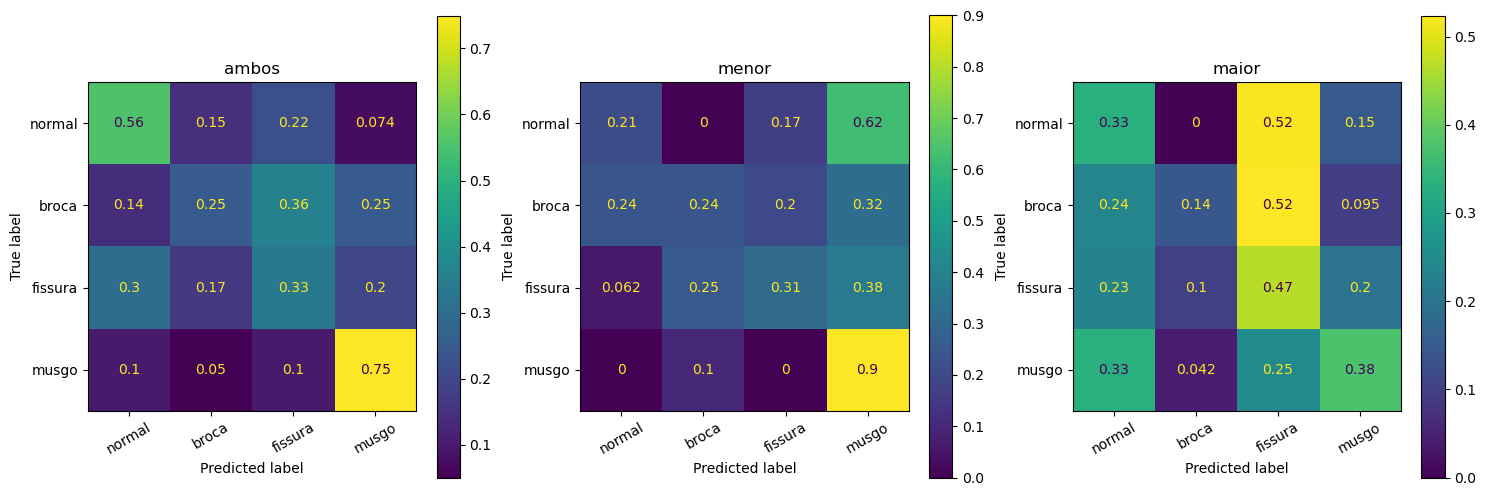

Rodada 11	-	Seed 6621


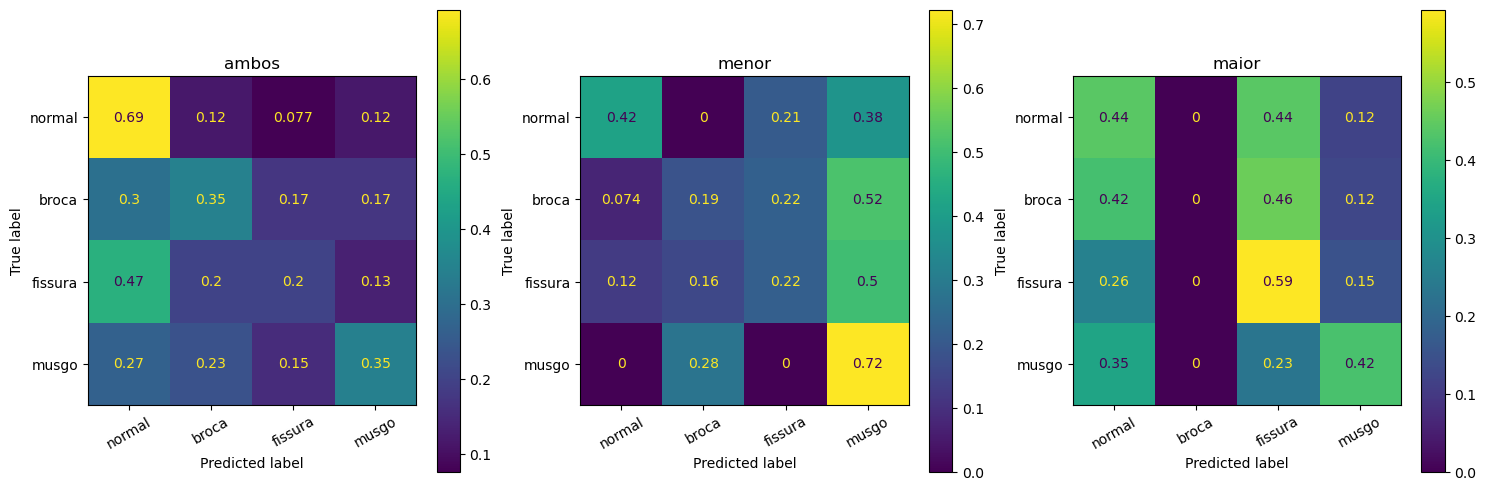

Rodada 12	-	Seed 1572


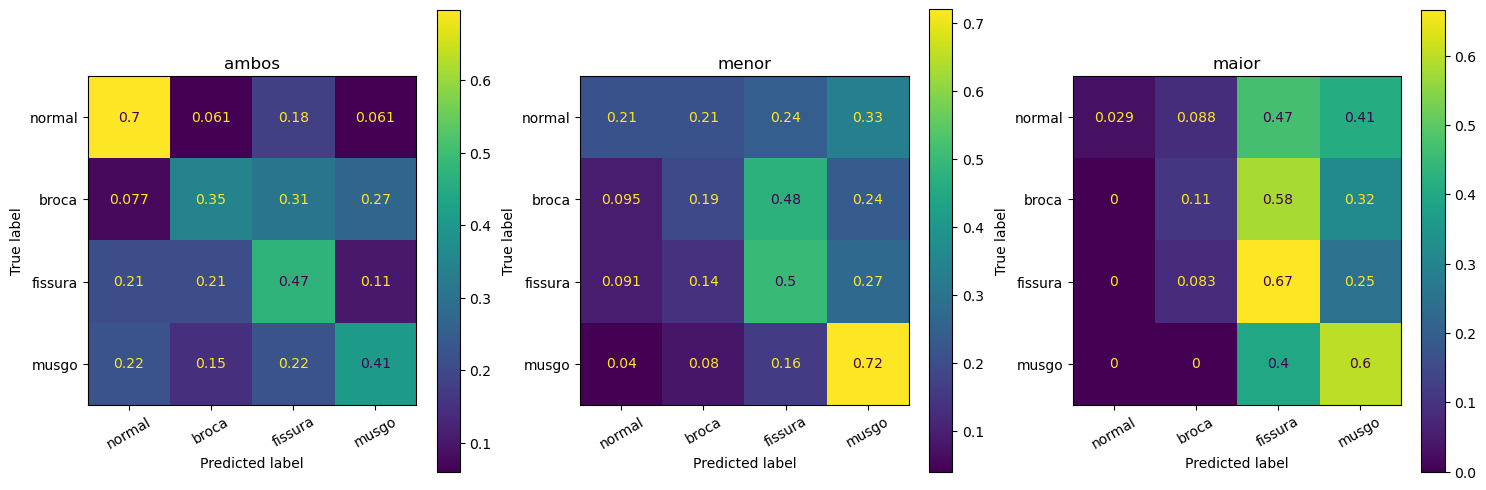

Rodada 13	-	Seed 553


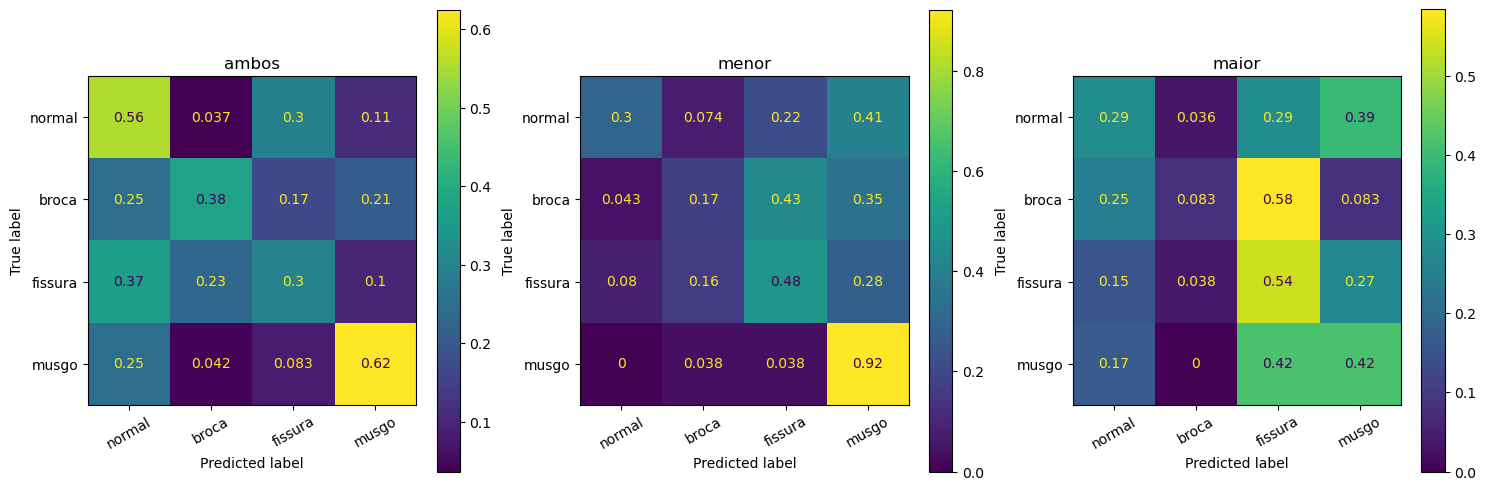

Rodada 14	-	Seed 1910


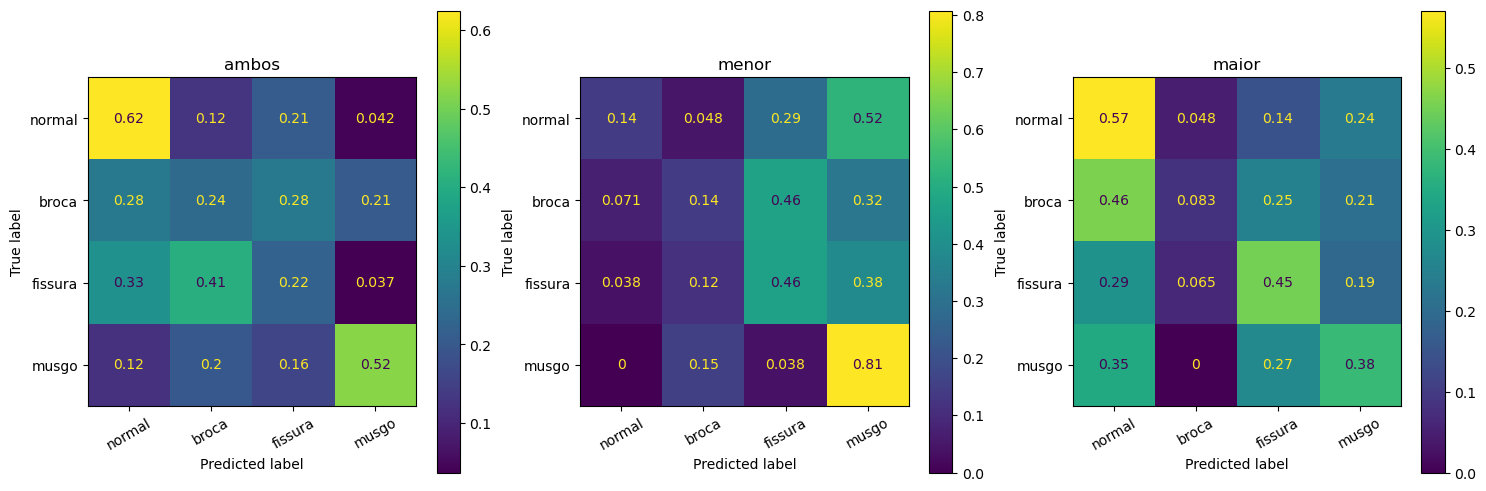

Rodada 15	-	Seed 221


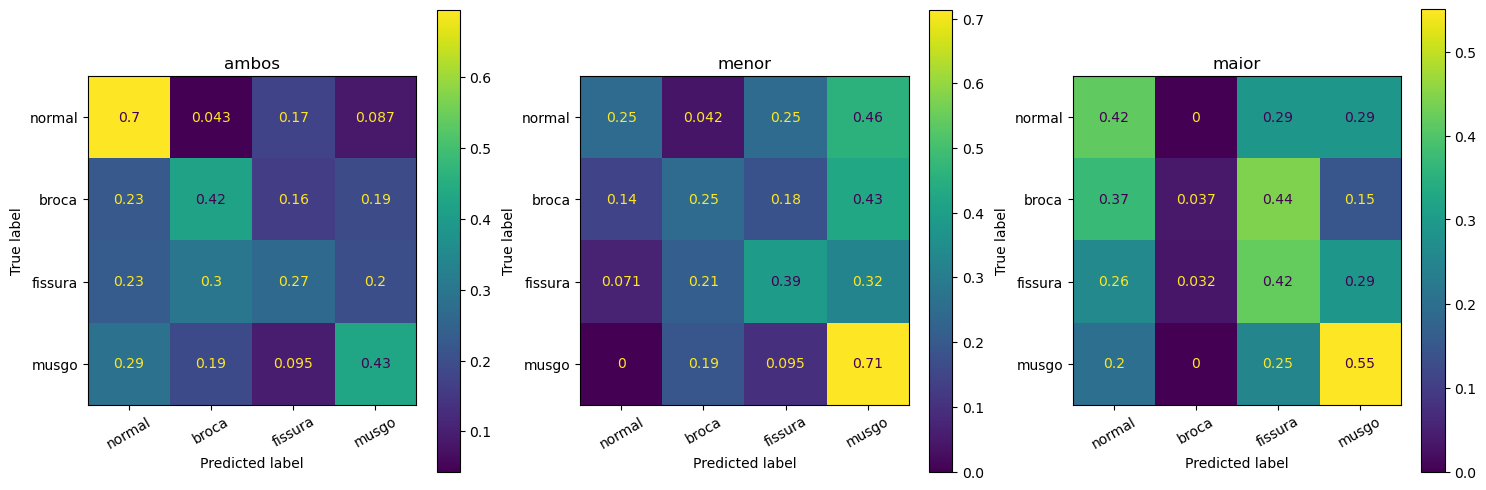

Rodada 16	-	Seed 5581


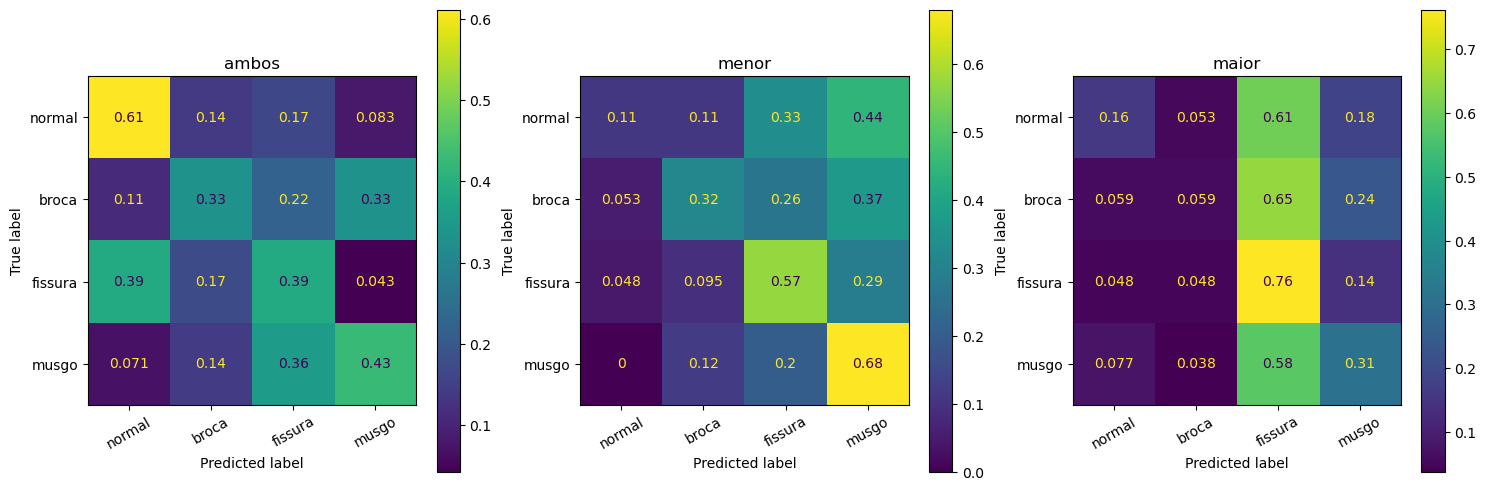

Rodada 17	-	Seed 6325


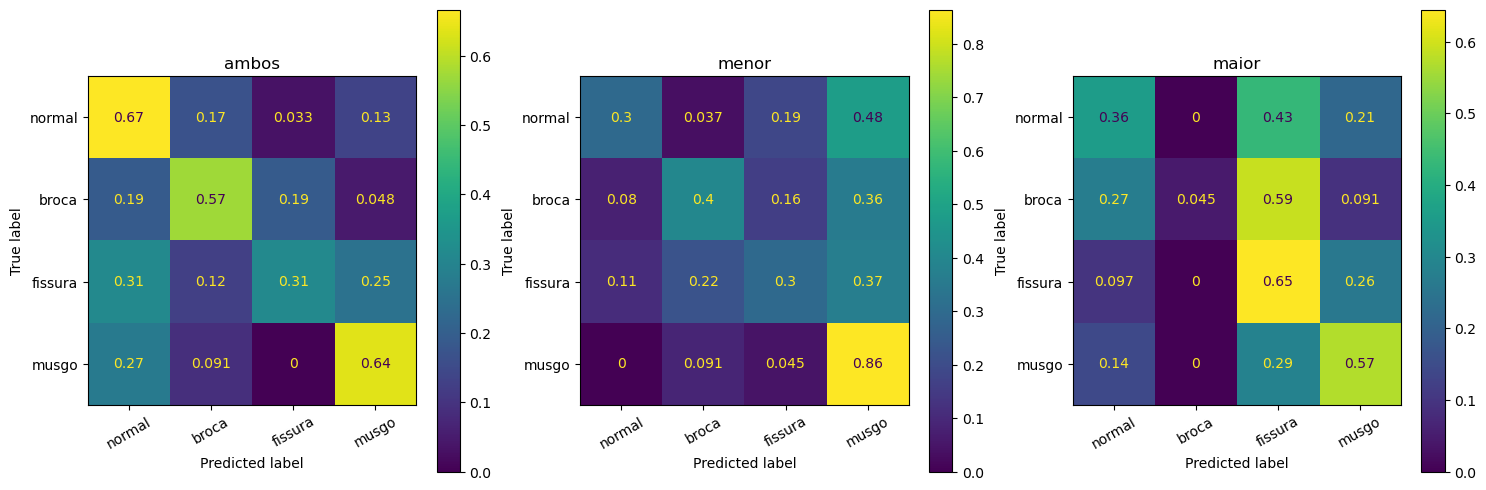

Rodada 18	-	Seed 3807


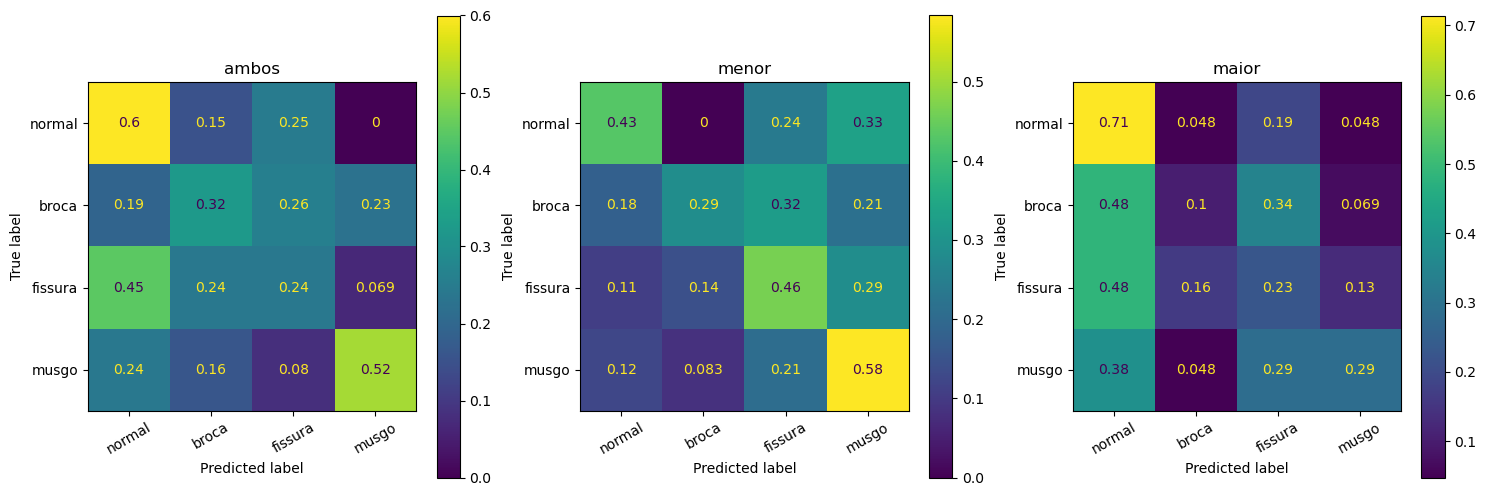

Rodada 19	-	Seed 2891


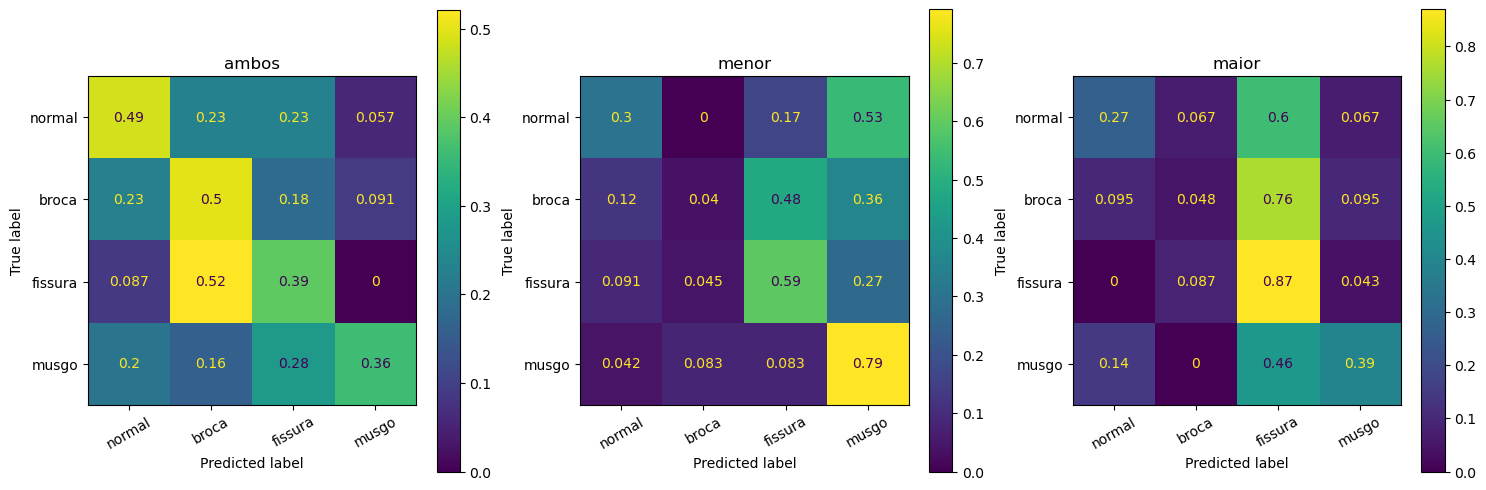

Rodada 20	-	Seed 1605


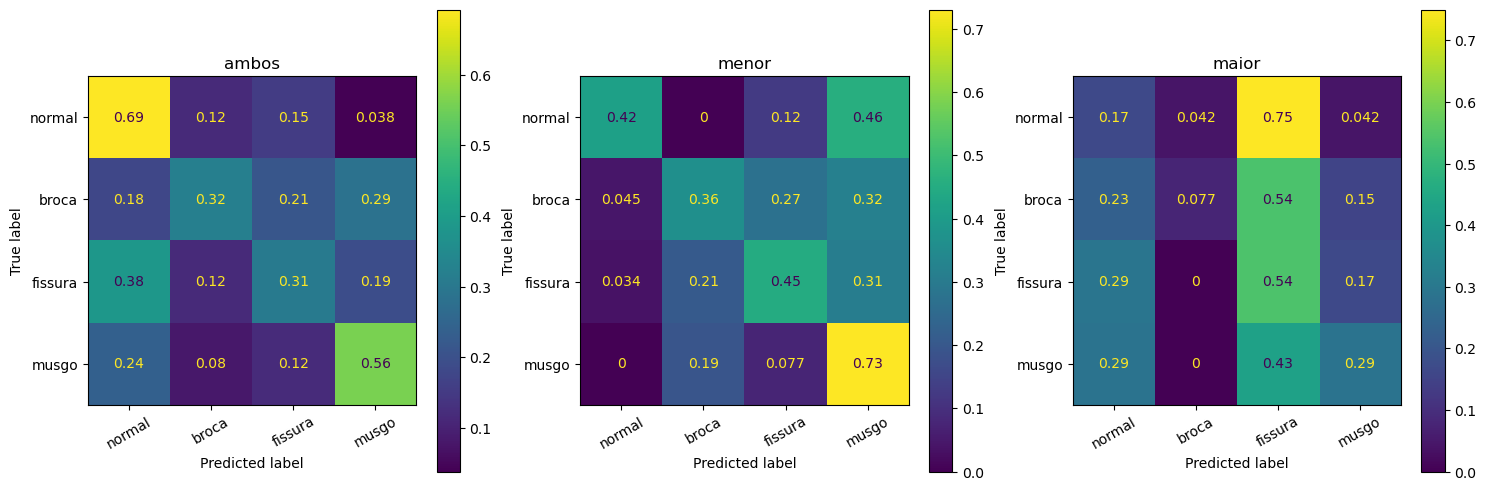

Rodada 21	-	Seed 5665


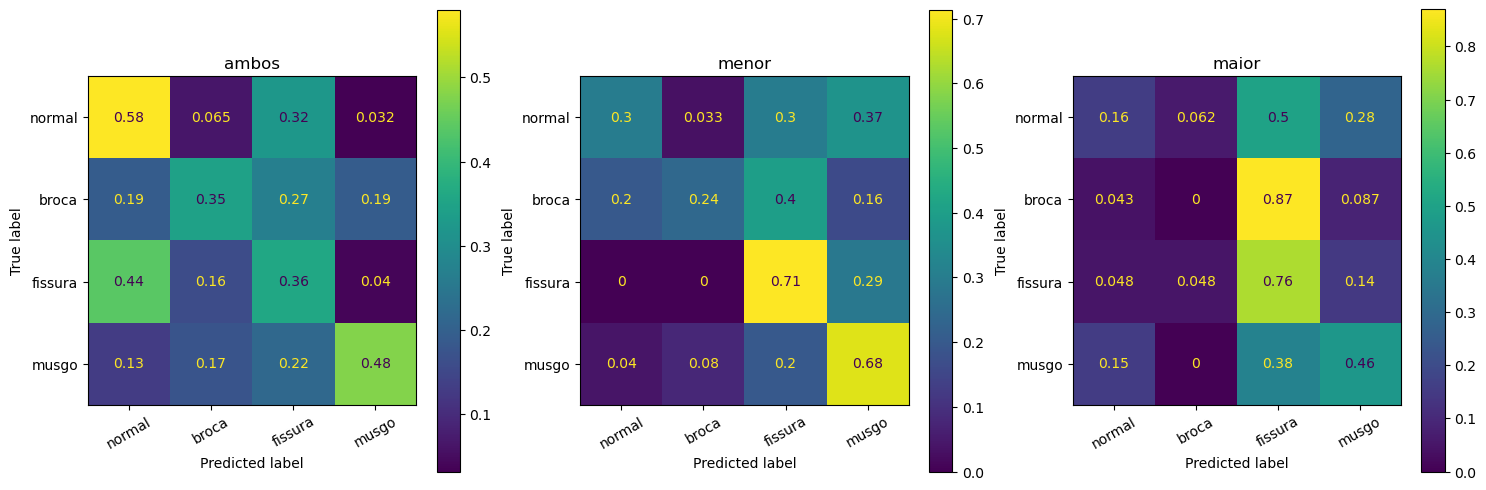

Rodada 22	-	Seed 3079


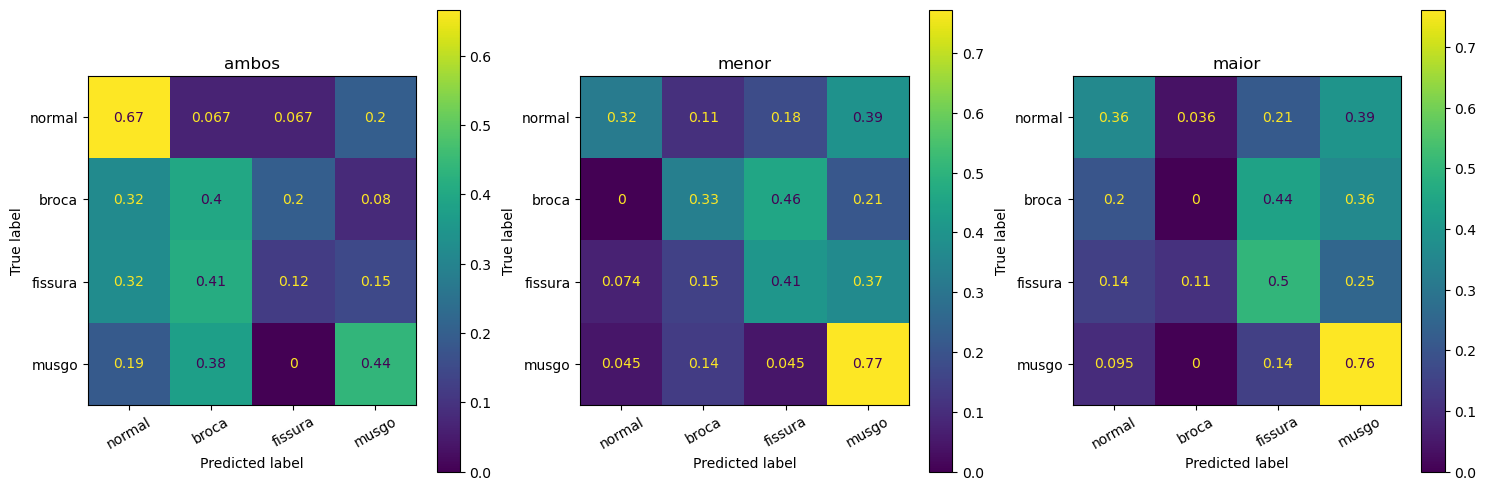

Rodada 23	-	Seed 5778


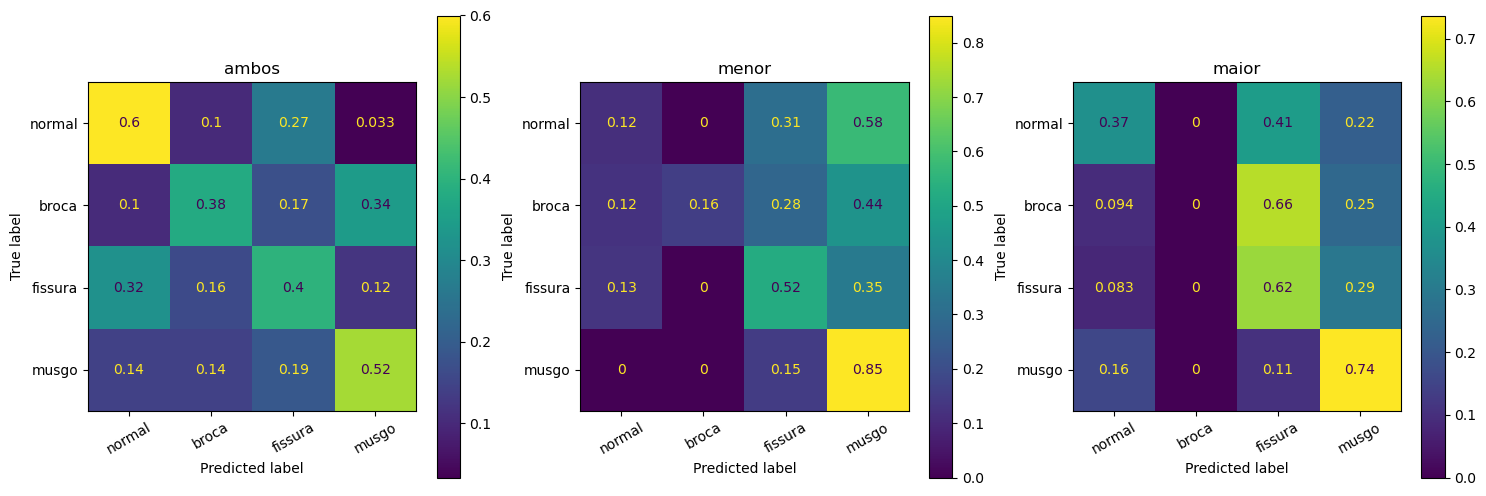

Rodada 24	-	Seed 596


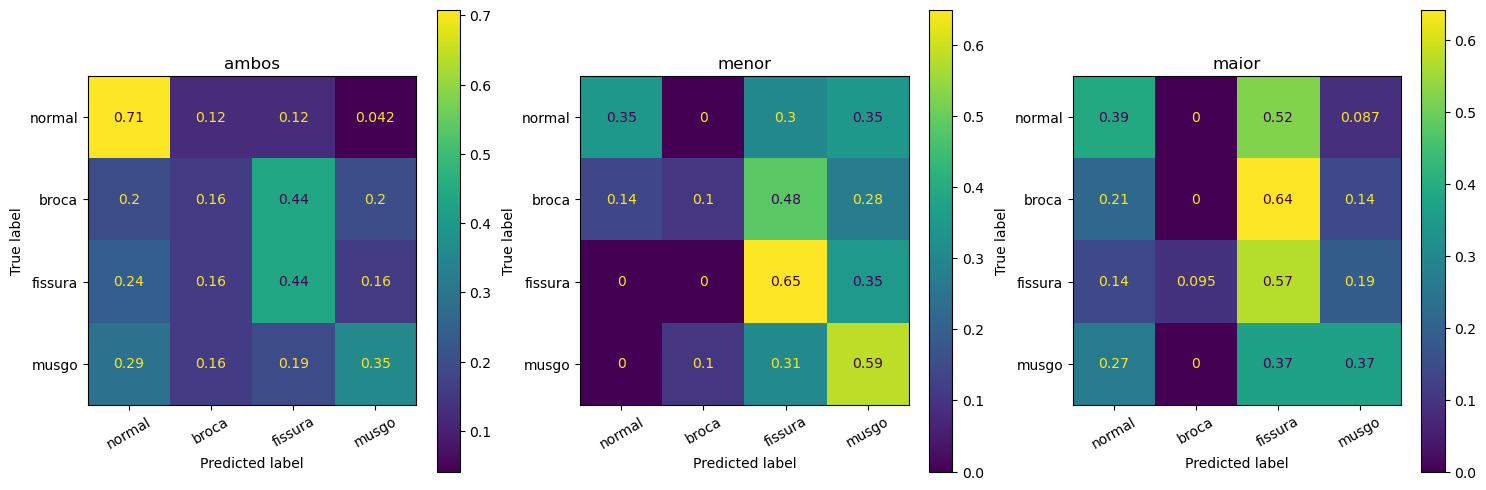

Rodada 25	-	Seed 432


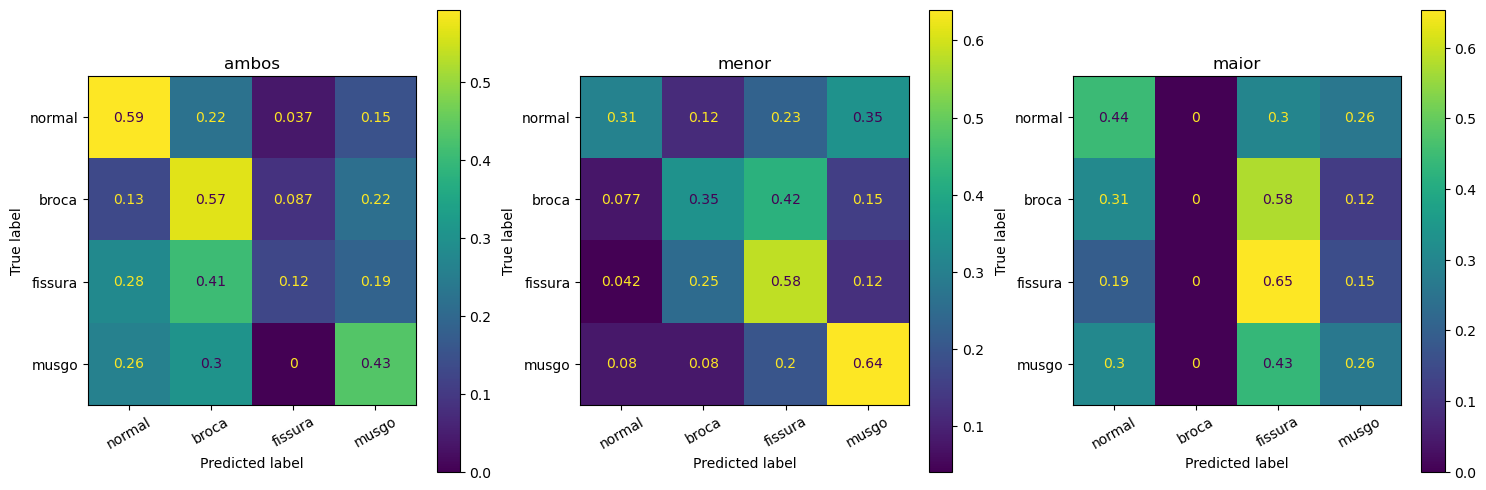

Rodada 26	-	Seed 4481


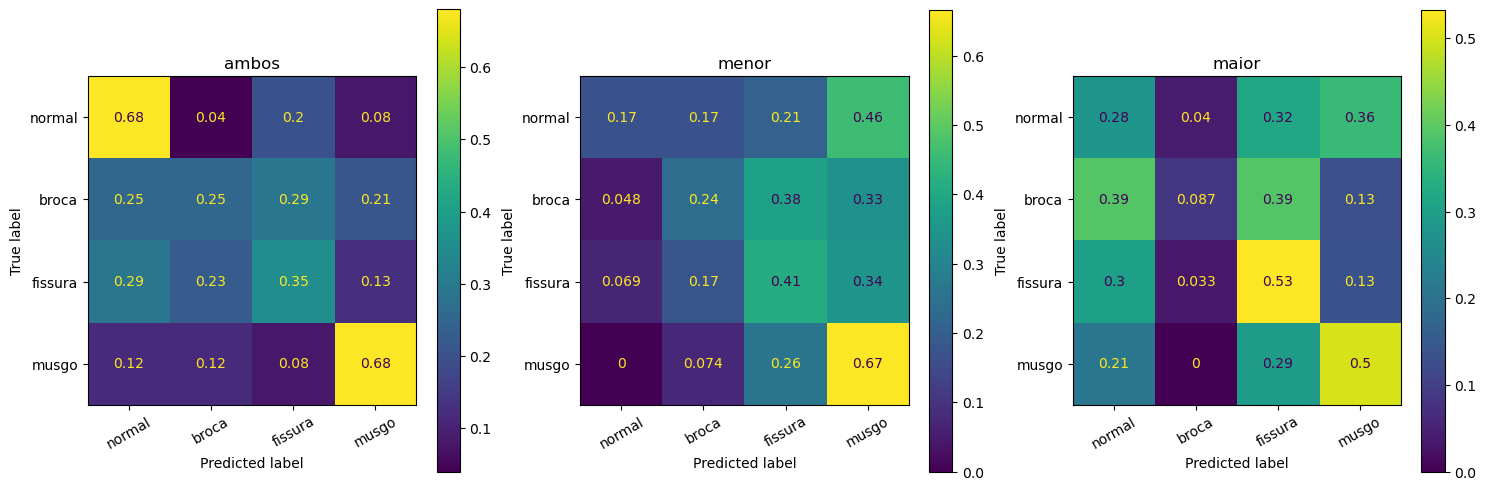

Rodada 27	-	Seed 2521


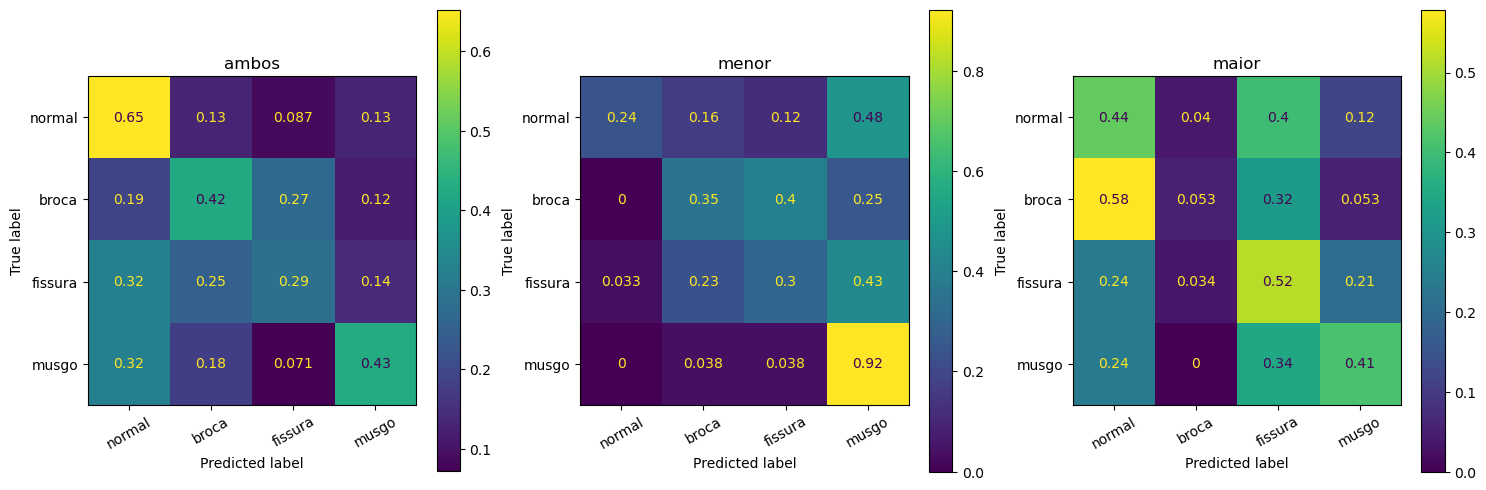

Rodada 28	-	Seed 1091


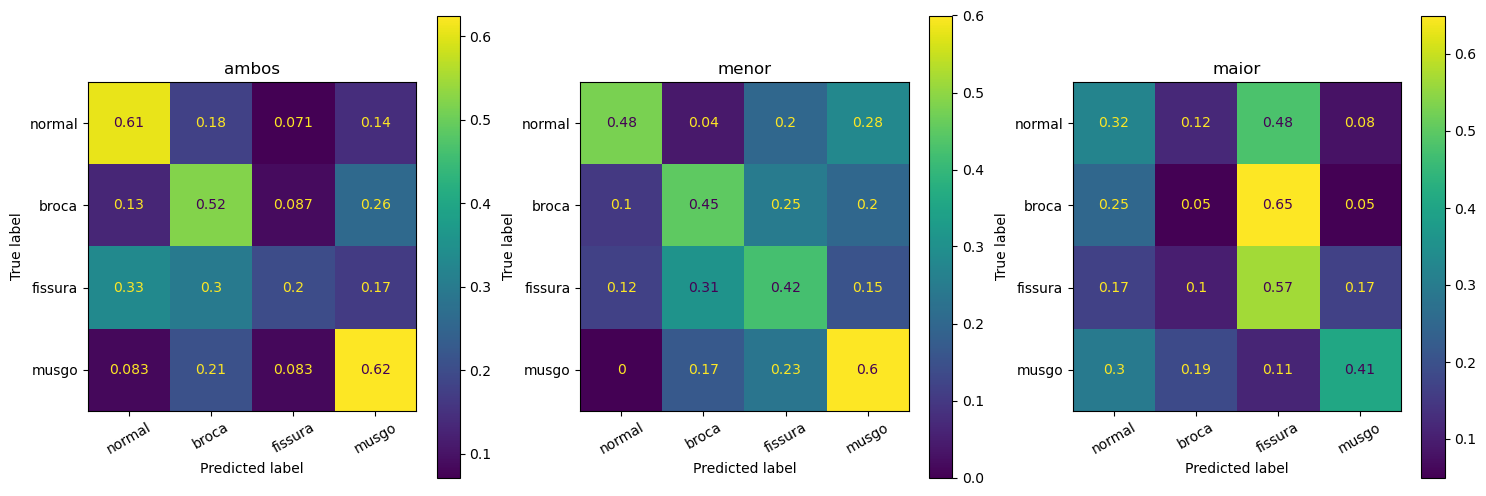

Rodada 29	-	Seed 4863


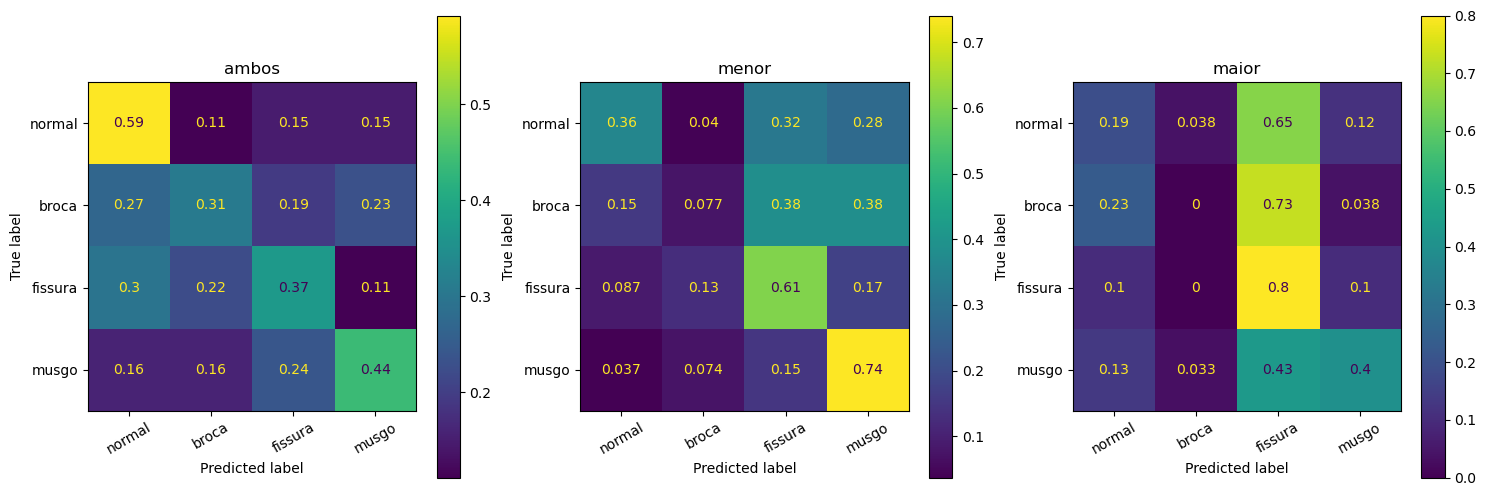

In [2]:
f_list = ['ambos', 'menor', 'maior']
X_list = []
for name in f_list:
  data = pd.read_csv(f'./csvs/prepro_2_{name}.csv').dropna()
  target = data.pop('target').values
  X_list.append((data.values, target))

acuracias = []

# Gerando 30 sementes "aleatórias" dentro do intervalo [0, 8000)
seed_arr = np.random.randint(8000, size=30)

for rodada, seed in enumerate(seed_arr):
  print(f'Rodada {rodada}\t-\tSeed {seed}')

  acc = [0, 0, 0]
  
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
  for i, (X, y) in enumerate(X_list):
    # separando dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # Instanciando classificador com padronizador
    clf = make_pipeline(StandardScaler(), SVC()).fit(X_train, y_train)

    acc[i] = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)

    # print(
    #   f'para {f_list[i]}\n',
    # classification_report(
    #   y_true=y_test,
    #   y_pred=y_pred,
    #   target_names=TARGET_NAMES)
    # )

    ax[i].title.set_text(f_list[i])
    plot_confusion_matrix(
      estimator=clf,
      X=X_test,
      y_true=y_test,
      display_labels=TARGET_NAMES,
      xticks_rotation=30,
      normalize='true',
      ax=ax[i])

  acuracias.append(acc)
  plt.show()

           ambos      menor      maior
count  30.000000  30.000000  30.000000
mean    0.446349   0.432343   0.345425
std     0.040924   0.042033   0.040191
min     0.371429   0.346535   0.245098
25%     0.411905   0.398515   0.323529
50%     0.447619   0.430693   0.343137
75%     0.473810   0.462871   0.372549
max     0.533333   0.504950   0.421569


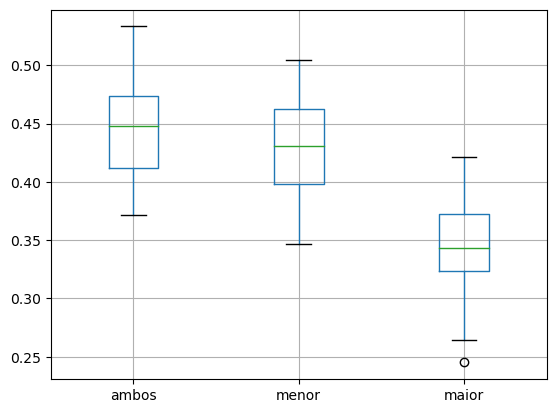

ambos,menor,maior
0.495238,0.425743,0.382353
0.457143,0.475248,0.401961
0.400000,0.415842,0.323529
0.371429,0.405941,0.352941
0.419048,0.415842,0.245098
0.457143,0.504950,0.372549
0.504762,0.455446,0.303922
0.514286,0.445545,0.343137
0.428571,0.425743,0.362745
0.457143,0.504950,0.303922


In [3]:
acc_df = pd.DataFrame(data=acuracias, columns=f_list)

print(acc_df.describe())

acc_df.boxplot()
plt.show()
acc_df.style.hide_index().background_gradient(cmap='Blues')